<a href="https://colab.research.google.com/github/josepeon/calculus_parsons/blob/main/integration_extra.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integration: Extra Examples

**OBJECTIVES**

- Use Riemann Sums to approximate Areas
- Develop and Implement Trapezoidal Rule for Area Approximation
- Introduce Monte Carlo methods for Area Approximation

## Riemann Sums

In [ ]:
from IPython.display import IFrame
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.display.float_format = '{:,.10f}'.format

In [ ]:
drawing = IFrame(src = '', width = 400, height = 600)



$${\displaystyle S=\sum _{i=1}^{n}f(x_{i}^{*})\,\Delta x_{i}}$$

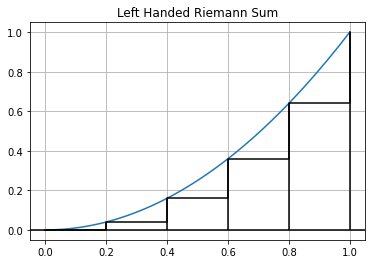

In [ ]:
def f(x): return x**2
x = np.linspace(0, 1, 100)
plt.plot(x, f(x))
plt.axhline(color = 'black')
for xval in [0, 0.2, 0.4, 0.6, 0.8, 1.0]:
    plt.vlines(xval, 0, f(xval), color = 'black')
x2 = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.step(x2, f(x2), where = 'post', color = 'black')
plt.grid()
plt.title('Left Handed Riemann Sum');

### Symbolic Solution

In [ ]:
import sympy as sy

In [ ]:
x, p = sy.symbols('x p')

In [ ]:
sy.integrate(x**2, x)

x**3/3

In [ ]:
sy.integrate(x**p, x)

Piecewise((x**(p + 1)/(p + 1), Ne(p, -1)), (log(x), True))

In [ ]:
sy.integrate(x**2, (x, 0, 1))

1/3

### Compare to our Approximation

In [ ]:
def riemann(x, n):
    '''
    This function computes a left-handed
    riemann approximation for area under
    a function f over an interval x
    ======
    Arguments
    x = array; domain of interest
    n = integer; number of rectangles to use
    ======
    Returns
    area = float; area approximation
    '''
    #find the width
    width = (x[-1] - x[0])/n
    #where we find heights
    endpoints = [x[0] + width*i for i in range(n)]
    #find the heights
    heights = f(np.array(endpoints))
    #total area
    area = width*sum(heights)
    return area

In [ ]:
x = np.linspace(0, 1, 100)

In [ ]:
#approximation with 4 rectangles
riemann(x, 4)

0.21875

In [ ]:
#error with 4 rectangles
1/3 - riemann(x, 4)

0.11458333333333331

In [ ]:
divs = [4, 40, 400, 4000, 40_000, 400_000]

In [ ]:
#approximations for many n's
approxs = [riemann(x, i) for i in divs]
#error in approximations
errors = [1/3 - approx for approx in approxs]

In [ ]:
#dataframe of errors
error_df = pd.DataFrame({'subdivisions': divs,
                         'riemann_area': approxs,
                         'riemann_error': errors})

In [ ]:
#examine the errors
error_df

,subdivisions,riemann_area,riemann_error
0,4,0.2187500000,0.1145833333
1,40,0.3209375000,0.0123958333
2,400,0.3320843750,0.0012489583
3,4000,0.3332083438,0.0001249896
4,40000,0.3333208334,0.0000124999
5,400000,0.3333320833,0.0000012500


### Trapezoid Rule

<center>
 <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/1/11/Trapezoid.svg/440px-Trapezoid.svg.png />
</center>

$$\text{Area} = \frac{a + b}{2} \times h$$

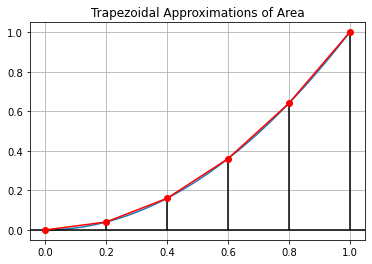

In [ ]:
def f(x): return x**2
x = np.linspace(0, 1, 100)
plt.plot(x, f(x))
# plt.ylim(-2, 2)
plt.axhline(color = 'black')
for xval in [0, 0.2, 0.4, 0.6, 0.8, 1.0]:
    plt.vlines(xval, 0, f(xval), color = 'black')
x2 = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0])
plt.plot(x2, f(x2), '-ro')
plt.grid();
plt.title('Trapezoidal Approximations of Area');

In [ ]:
drawing

In [ ]:
#domain
x = np.linspace(0, 1, 100)

In [ ]:
#heights
heights = f(x)

In [ ]:
np.array([2*f(i) for i in x2[1:-1]])

array([0.08, 0.32, 0.72, 1.28])

In [ ]:
#areas
sum(f(x2[0]) + np.array([2*f(i) for i in x2[1:-1]]) + f(x2[-1]) )

6.4

In [ ]:
.2*sum(f(x2[0]) + np.array([2*f(i) for i in x2[1:-1]]) + f(x2[-1]) )

1.2800000000000002

In [ ]:
.2/2*sum(f(x2[0]) + 2*f(x2[1:-1]) + f(x2[-1]))

0.6400000000000001

In [ ]:
abs(1/3 - .2/2*sum(f(x2[0]) + 2*f(x2[1:-1]) + f(x2[-1])))

0.3066666666666668

In [ ]:
def trapezoid_approx(x, n):
    '''
    This function computes a
    trapezoidal approximation for
    the area under function f on x
    ======
    Arguments
    x = array; domain of interest
    n = integer; number of trapezoids to use
    ======
    Returns
    area = float; area approximation
    '''
    width = (x[-1] - x[0])/n
    bases = np.array([x[0] + i*width for i in range(n + 1)])
    heights = f(bases)
    areas = f(heights[0]) + sum(2*(heights[1:-1])) + f(heights[-1])
    return width/2*areas

In [ ]:
trapezoid_approx(x, 4)

0.34375

In [ ]:
#approximations for many n's
approxs = [trapezoid_approx(x, i) for i in [4, 40, 400, 4000, 40_000, 400_000]]
#error in approximations
errors = [round(abs(1/3 - approx), 10) for approx in approxs]

In [ ]:
error_df['triangular_approximation'] = approxs
error_df['triangular_errors'] = errors

In [ ]:
error_df

,subdivisions,riemann_area,riemann_error,triangular_approximation,triangular_errors
0,4,0.2187500000,0.1145833333,0.3437500000,0.0104166667
1,40,0.3209375000,0.0123958333,0.3334375000,0.0001041667
2,400,0.3320843750,0.0012489583,0.3333343750,0.0000010417
3,4000,0.3332083438,0.0001249896,0.3333333438,0.0000000104
4,40000,0.3333208334,0.0000124999,0.3333333334,0.0000000001
5,400000,0.3333320833,0.0000012500,0.3333333333,0.0000000000


### Alternative Approach: Monte Carlo Integration

<center>
 <img src = https://upload.wikimedia.org/wikipedia/commons/thumb/f/f3/Le_casino_de_Monte-Carlo.JPG/440px-Le_casino_de_Monte-Carlo.JPG />
 </center>

In [ ]:
x = np.linspace(0, 1, 1_000_000)

In [ ]:
random_x = np.random.choice(x)

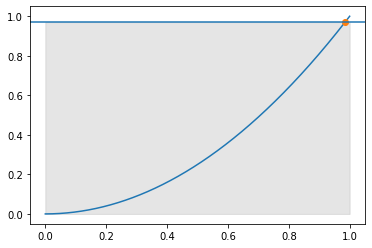

In [ ]:
plt.plot(x, f(x))
plt.plot(random_x, f(random_x), 'o')
plt.axhline(f(random_x))
plt.fill_between(x, f(random_x), color = 'gray', alpha = 0.2)

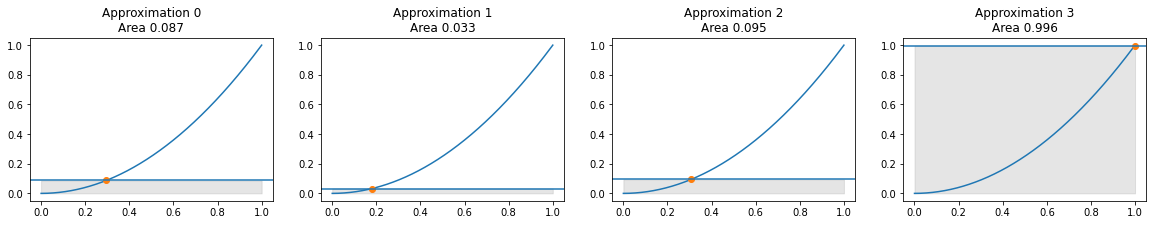

In [ ]:
fig, ax = plt.subplots(1, 4, figsize = (20, 3))
for i in range(4):
    random_x = np.random.choice(x)
    ax[i].plot(x, f(x))
    ax[i].plot(random_x, f(random_x), 'o')
    ax[i].axhline(f(random_x))
    ax[i].fill_between(x, f(random_x), color = 'gray', alpha = 0.2)
    ax[i].set_title(f'Approximation {i}\nArea {f(random_x):.3f}')

$$\text{Area} = \frac{1}{n} \sum_{i = 1}^n \text{area}_i $$

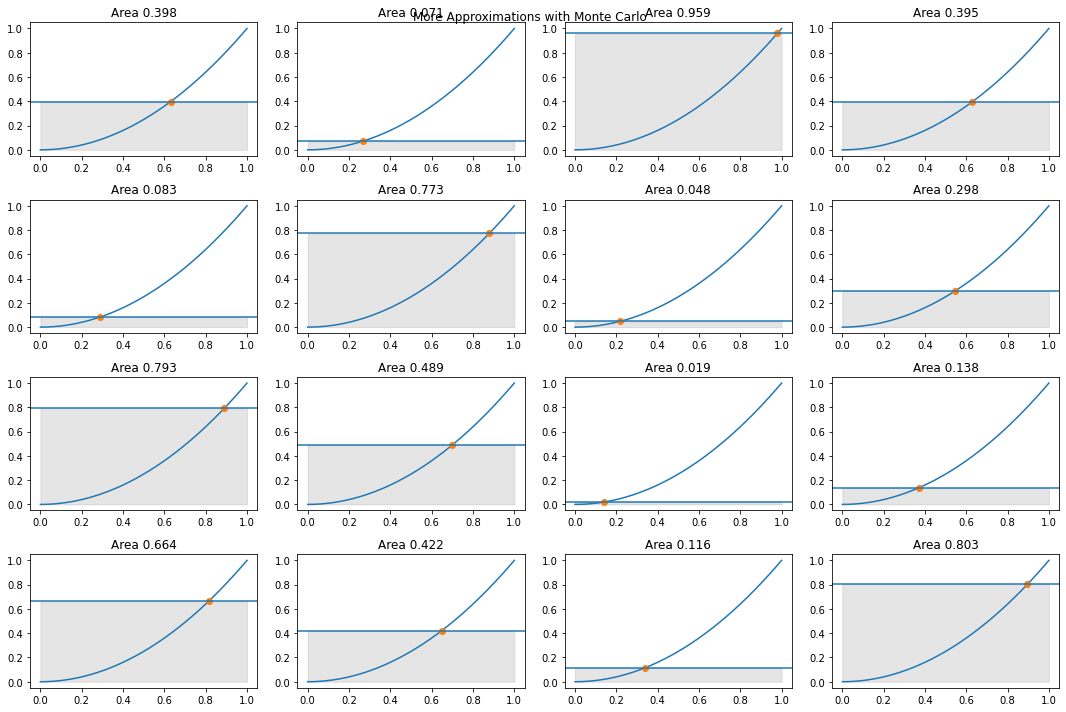

In [ ]:
fig, ax = plt.subplots(4, 4, figsize = (15, 10))
for i in range(4):
    for j in range(4):
        random_x = np.random.choice(x)
        ax[i,j].plot(x, f(x))
        ax[i,j].plot(random_x, f(random_x), 'o')
        ax[i,j].axhline(f(random_x))
        ax[i,j].fill_between(x, f(random_x), color = 'gray', alpha = 0.2)
        ax[i,j].set_title(f'Area {f(random_x):.3f}')
fig.suptitle('More Approximations with Monte Carlo');
plt.tight_layout();

In [ ]:
np.random.choice(x, 100)

array([0.63276363, 0.62239162, 0.81056681, 0.96534197, 0.20526421,
       0.93617794, 0.36864937, 0.82330782, 0.98721099, 0.47670648,
       0.35847436, 0.15743816, 0.64761365, 0.94954195, 0.00899501,
       0.52761053, 0.70638871, 0.46909147, 0.54883655, 0.87145487,
       0.03677304, 0.06353406, 0.66364666, 0.23807224, 0.93090793,
       0.14235614, 0.8048528 , 0.24085824, 0.76349876, 0.77057577,
       0.3969084 , 0.84730085, 0.51175251, 0.57685858, 0.98883699,
       0.08411908, 0.65380465, 0.54721155, 0.73700474, 0.21680222,
       0.93030693, 0.89208089, 0.03598504, 0.72476372, 0.85242685,
       0.97302297, 0.2984963 , 0.26800827, 0.52010852, 0.16647017,
       0.45649546, 0.69246569, 0.46649247, 0.27791628, 0.72903373,
       0.56444856, 0.44941745, 0.19464419, 0.43680244, 0.5002005 ,
       0.25433225, 0.73574274, 0.38411538, 0.04510005, 0.02006302,
       0.72876573, 0.31407531, 0.13782214, 0.17779518, 0.47953448,
       0.04607205, 0.04396204, 0.23708024, 0.56016756, 0.63367

In [ ]:
np.mean(f(np.random.choice(x, 4)))

0.06952510155688357

In [ ]:
def monte_carlo(x, n):
  return np.mean(f(np.random.choice(x, n, replace=False)))

In [ ]:
approxs = [monte_carlo(x, i) for i in divs]
errors = [abs(1/3 - approx) for approx in approxs]

In [ ]:
error_df['monte_carlo_approx'] = approxs
error_df['monte_carlo_error'] = errors

In [ ]:
error_df

,subdivisions,riemann_area,riemann_error,triangular_approximation,triangular_errors,monte_carlo_approx,monte_carlo_error
0,4,0.2187500000,0.1145833333,0.3437500000,0.0104166667,0.4939531102,0.1606197768
1,40,0.3209375000,0.0123958333,0.3334375000,0.0001041667,0.3072897714,0.0260435619
2,400,0.3320843750,0.0012489583,0.3333343750,0.0000010417,0.3463238466,0.0129905132
3,4000,0.3332083438,0.0001249896,0.3333333438,0.0000000104,0.3426204609,0.0092871276
4,40000,0.3333208334,0.0000124999,0.3333333334,0.0000000001,0.3333702666,0.0000369333
5,400000,0.3333320833,0.0000012500,0.3333333333,0.0000000000,0.3333577952,0.0000244619


### Comparing Computation Time

In [ ]:
%%time
riemann(x, 100_000)

CPU times: user 125 ms, sys: 2.9 ms, total: 128 ms
Wall time: 129 ms


0.3333283333499996

In [ ]:
%%time
trapezoid_approx(x, 100_000)

CPU times: user 114 ms, sys: 3.16 ms, total: 118 ms
Wall time: 122 ms


0.3333333333499996

In [ ]:
%%time
monte_carlo(x, 100_000)

CPU times: user 39.8 ms, sys: 0 ns, total: 39.8 ms
Wall time: 43.9 ms


0.3328312897068973

### Problems

1. Compare the left-handed riemann approximation with $n = 100$, trapezoidal approximation with $n = 100$, and monte carlo approximation with $n = 100$ for the following functions on the given interval:

- $f(x) = \sin(\sin(x) - x)dx \quad [0, 2\pi]$
- $g(x) = \cos^{2020}(x) dx \quad [0, 2\pi]$

2. Approximating $\pi$.  The circular region in the first quadrant can be defined by $y = \sqrt{1 - x^2}$.  We can determine an approximation for $\pi$ by doing the following:

- Drop many random points on the square.
- If the points are less than $\sqrt{1 - x^2}$ we will count them, if they are outside the circle we will not
- Determine the ratio of points dropped to points counted, multiply by 4

Write a small python program to conduct this simulation and plot the results coloring the points accepted and rejected blue and red respectively.  How good was your approximation?

3. Read Metropolis' account of the history of Monte Carlo methods.  Write a brief response that contains your own summary of the history and your reaction to enjoyment of the reading. [Article: The Beginning of the Monte Carlo Method](https://permalink.lanl.gov/object/tr?what=info:lanl-repo/lareport/LA-UR-88-9067)